# Predict The Flight Ticket Price 


Importing the required libraries as shown below

Data Analysing

Data Visualization

Exploratory data analysis(EDA)

Data Preprocessing

Model Building

Cross Validation and Prediction

Grid Search

Saving the model with joblib

Conclusion

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

C:\Users\Suhas\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
train=pd.read_excel('flight_train.xlsx')
test=pd.read_excel('flight_test.xlsx')

In [3]:
train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [5]:
data=train.append(test,sort=False)

In [6]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


Dataset deatils of columns

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [7]:
#data types of columns level

data.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

In [8]:
#data info of columns

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [9]:
#columns of dataset

data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [10]:
#finding the null values in the columns

data.isnull().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route               True
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops         True
Additional_Info    False
Price               True
dtype: bool

In [11]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


# Exploratory Data Analysis (EDA)

Lets analyze dataset column by column and preform EDA process

In [12]:
data['Airline'].value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

Top 5 busy Airlines

Jet Airways                          4746,
IndiGo                               2564,
Air India                            2192,
Multiple carriers                    1543,
SpiceJet                             1026

Here Jet Airways has highest number of traveling and business compared to all other airlines 

Graph representation as shown below

# Univariate plots

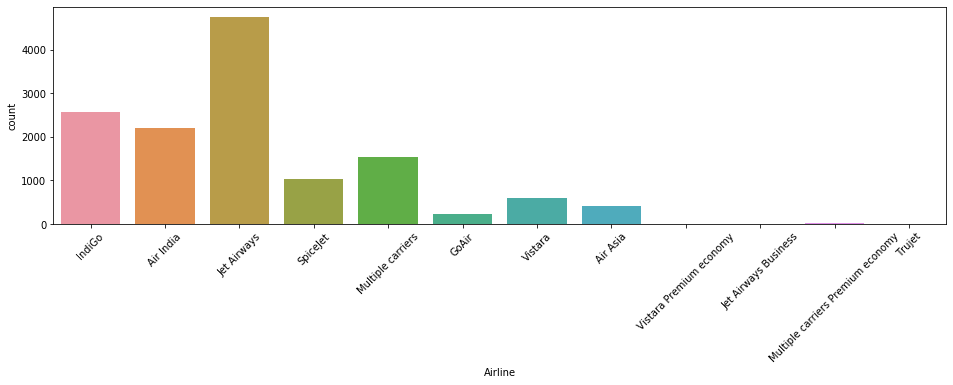

In [13]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=45)
sb.countplot(data['Airline'])

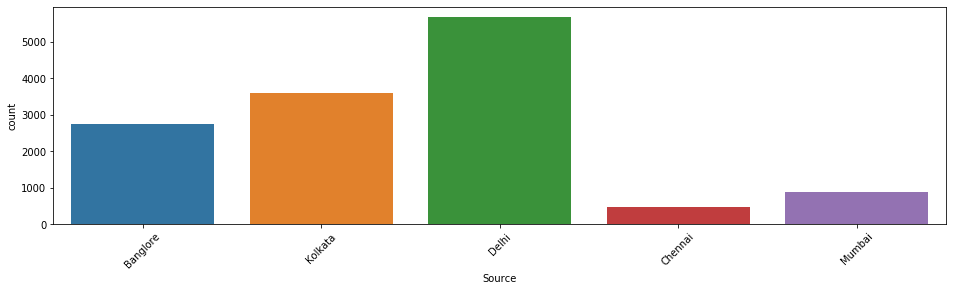

In [14]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=45)
sb.countplot(data['Source'])

In the given dataset Source of air travelling is to Delhi ,Kolkata and Bangalore are the top 3 source travelling.

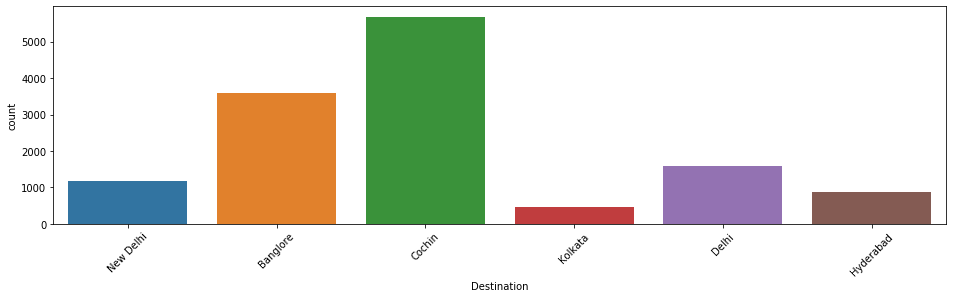

In [15]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=45)
sb.countplot(data['Destination'])

In the given dataset Destination of air travelling is to  Cochin ,Bangalore and Delhi are the top 3 destination travelling.

Bivariate Plot

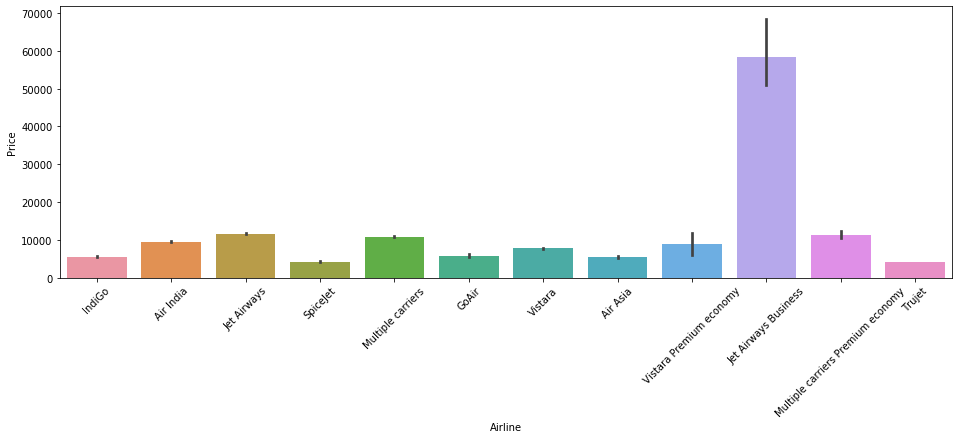

In [16]:
plt.figure(figsize=(16,5))
plt.xticks(rotation=45)
sb.barplot(x='Airline',y='Price',data=data)

Jet Airways are costly compared to other airline service providers 

You will get clear idea on cost and airline services

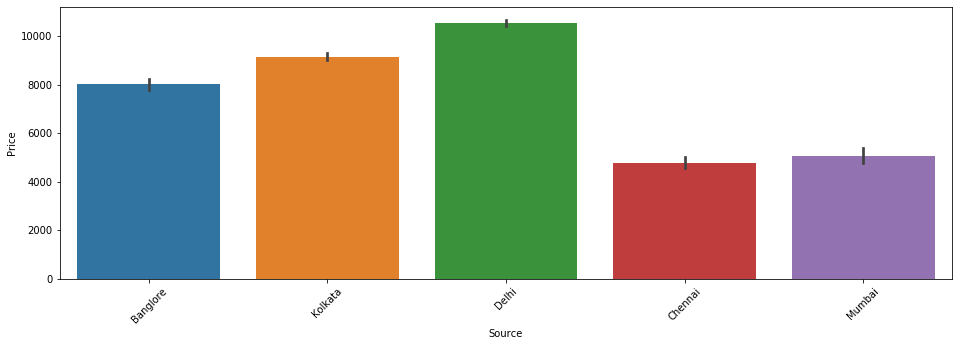

In [17]:
plt.figure(figsize=(16,5))
plt.xticks(rotation=45)
sb.barplot(x='Source',y='Price',data=data)

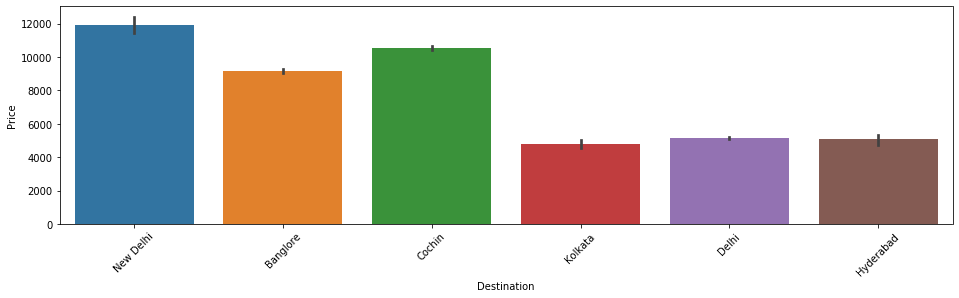

In [18]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=45)
sb.barplot(x='Destination',y='Price',data=data)

In [19]:
#spliting the date into 3 parts as shown below

data['day']=data['Date_of_Journey'].str.split('/').str[0]
data['month']=data['Date_of_Journey'].str.split('/').str[1]
data['year']=data['Date_of_Journey'].str.split('/').str[2]
data=data.drop(['Date_of_Journey'],axis=1)

In [20]:
#converting the data to int type

data['day']=data['day'].astype(int)
data['month']=data['month'].astype(int)
data['year']=data['year'].astype(int)

In [21]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [22]:
#data types of columns

data.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
day                  int32
month                int32
year                 int32
dtype: object

In [23]:
#finding the null values in the column

data['Total_Stops'].isnull().sum()

1

In [24]:
#filling the null value with fillna

data['Total_Stops']=data['Total_Stops'].fillna('1 stop')

In [25]:
#finding the null value after fillna

data['Total_Stops'].isnull().sum()

0

In [26]:
data['Total_Stops'].value_counts()

1 stop      7057
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [27]:
#replacing the non-stop into 0 stop

data['Total_Stops']=data['Total_Stops'].replace('non-stop','0 stop')

In [28]:
#spliting stops and considering required value

data['Stops']=data['Total_Stops'].str.split(' ').str[0]
data['Stops']=data['Stops'].astype('int')
data=data.drop(['Total_Stops'],axis=1)
data

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,day,month,year,Stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,No info,3897.0,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662.0,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218.0,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302.0,1,3,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,No info,NaN,6,6,2019,1
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,No info,NaN,27,3,2019,0
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,No info,NaN,6,3,2019,1
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,No info,NaN,6,3,2019,1


In [29]:
data.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Additional_Info     object
Price              float64
day                  int32
month                int32
year                 int32
Stops                int32
dtype: object

In [30]:
#spliting Arrival_Time and considering required value

data['Arrival_Time']=data['Arrival_Time'].str.split(' ').str[0]
data

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,day,month,year,Stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,No info,3897.0,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662.0,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218.0,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302.0,1,3,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25,23h 55m,No info,NaN,6,6,2019,1
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,No info,NaN,27,3,2019,0
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25,6h 35m,No info,NaN,6,3,2019,1
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,No info,NaN,6,3,2019,1


In [31]:
#spliting Arrival_Time and considering required value
#changing the data types

data['Arr_hour']=data['Arrival_Time'].str.split(':').str[0]
data['Arr_min']=data['Arrival_Time'].str.split(':').str[1]
data['Arr_hour']=data['Arr_hour'].astype(int)
data['Arr_min']=data['Arr_min'].astype(int)
data=data.drop(['Arrival_Time'],axis=1)
data

,Airline,Source,Destination,Route,Dep_Time,Duration,Additional_Info,Price,day,month,year,Stops,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,No info,3897.0,24,3,2019,0,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,No info,7662.0,1,5,2019,2,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,No info,13882.0,9,6,2019,2,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,No info,6218.0,12,5,2019,1,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,No info,13302.0,1,3,2019,1,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,23h 55m,No info,NaN,6,6,2019,1,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,2h 35m,No info,NaN,27,3,2019,0,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,6h 35m,No info,NaN,6,3,2019,1,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,15h 15m,No info,NaN,6,3,2019,1,19,15


In [32]:
#spliting Dep_Time and considering required value
#changing the data types

data['Dep_hour']=data['Dep_Time'].str.split(':').str[0]
data['Dep_min']=data['Dep_Time'].str.split(':').str[1]
data['Dep_hour']=data['Dep_hour'].astype(int)
data['Dep_min']=data['Dep_min'].astype(int)
data=data.drop(['Dep_Time'],axis=1)
data

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,day,month,year,Stops,Arr_hour,Arr_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,23h 55m,No info,NaN,6,6,2019,1,20,25,20,30
2667,IndiGo,Kolkata,Banglore,CCU → BLR,2h 35m,No info,NaN,27,3,2019,0,16,55,14,20
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6h 35m,No info,NaN,6,3,2019,1,4,25,21,50
2669,Air India,Delhi,Cochin,DEL → BOM → COK,15h 15m,No info,NaN,6,3,2019,1,19,15,4,0


In [33]:
#filling the data with fillna

data['Price'].fillna((data['Price'].mean()),inplace=True)

In [34]:
data['Price']

0        3897.000000
1        7662.000000
2       13882.000000
3        6218.000000
4       13302.000000
            ...     
2666     9087.064121
2667     9087.064121
2668     9087.064121
2669     9087.064121
2670     9087.064121
Name: Price, Length: 13354, dtype: float64

In [35]:
data.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,day,month,year,Stops,Arr_hour,Arr_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50


In [36]:
#drop the columns with are not required

data=data.drop(['Route','Duration',],axis=1)

In [37]:
data

,Airline,Source,Destination,Additional_Info,Price,day,month,year,Stops,Arr_hour,Arr_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,No info,3897.000000,24,3,2019,0,1,10,22,20
1,Air India,Kolkata,Banglore,No info,7662.000000,1,5,2019,2,13,15,5,50
2,Jet Airways,Delhi,Cochin,No info,13882.000000,9,6,2019,2,4,25,9,25
3,IndiGo,Kolkata,Banglore,No info,6218.000000,12,5,2019,1,23,30,18,5
4,IndiGo,Banglore,New Delhi,No info,13302.000000,1,3,2019,1,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,No info,9087.064121,6,6,2019,1,20,25,20,30
2667,IndiGo,Kolkata,Banglore,No info,9087.064121,27,3,2019,0,16,55,14,20
2668,Jet Airways,Delhi,Cochin,No info,9087.064121,6,3,2019,1,4,25,21,50
2669,Air India,Delhi,Cochin,No info,9087.064121,6,3,2019,1,19,15,4,0


In [38]:
col = ['Airline','Source','Destination','Additional_Info']

#preprocessing the data with label encoder

le=LabelEncoder()
data[col]=data[col].apply(lambda x:le.fit_transform(x))
data

,Airline,Source,Destination,Additional_Info,Price,day,month,year,Stops,Arr_hour,Arr_min,Dep_hour,Dep_min
0,3,0,5,8,3897.000000,24,3,2019,0,1,10,22,20
1,1,3,0,8,7662.000000,1,5,2019,2,13,15,5,50
2,4,2,1,8,13882.000000,9,6,2019,2,4,25,9,25
3,3,3,0,8,6218.000000,12,5,2019,1,23,30,18,5
4,3,0,5,8,13302.000000,1,3,2019,1,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,8,9087.064121,6,6,2019,1,20,25,20,30
2667,3,3,0,8,9087.064121,27,3,2019,0,16,55,14,20
2668,4,2,1,8,9087.064121,6,3,2019,1,4,25,21,50
2669,1,2,1,8,9087.064121,6,3,2019,1,19,15,4,0


In [39]:
#finding null value in the columns

data.isnull().sum()

Airline            0
Source             0
Destination        0
Additional_Info    0
Price              0
day                0
month              0
year               0
Stops              0
Arr_hour           0
Arr_min            0
Dep_hour           0
Dep_min            0
dtype: int64

In [40]:
#To get the descriptive analysis 

data.describe()

,Airline,Source,Destination,Additional_Info,Price,day,month,year,Stops,Arr_hour,Arr_min,Dep_hour,Dep_min
count,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.0,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000
mean,3.977086,1.954096,1.435450,7.407743,9087.064121,13.389846,4.710574,2019.0,0.826045,13.396061,24.664146,12.513254,24.507264
std,2.363997,1.178607,1.473368,1.198393,4124.447805,8.439060,1.165622,0.0,0.674608,6.896145,16.559723,5.736273,18.832385
min,0.000000,0.000000,0.000000,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,8.000000,6135.250000,6.000000,3.000000,2019.0,0.000000,8.000000,10.000000,8.000000,5.000000
50%,4.000000,2.000000,1.000000,8.000000,9087.064121,12.000000,5.000000,2019.0,1.000000,14.000000,25.000000,11.000000,25.000000
75%,4.000000,3.000000,2.000000,8.000000,11087.000000,21.000000,6.000000,2019.0,1.000000,19.000000,35.000000,18.000000,40.000000
max,11.000000,4.000000,5.000000,9.000000,79512.000000,27.000000,6.000000,2019.0,4.000000,23.000000,55.000000,23.000000,55.000000


In [41]:
# the Correlation between the different variables

data.corr()

,Airline,Source,Destination,Additional_Info,Price,day,month,year,Stops,Arr_hour,Arr_min,Dep_hour,Dep_min
Airline,1.000000,-0.018547,0.022130,-0.058533,-0.035170,0.020666,0.028929,NaN,-0.206350,-0.007831,-0.074001,-0.026127,-0.057826
Source,-0.018547,1.000000,-0.589710,-0.022219,0.014292,-0.002568,0.180685,NaN,0.191144,0.020766,0.015057,0.058471,-0.058563
Destination,0.022130,-0.589710,1.000000,0.027398,-0.063664,-0.035144,-0.362327,NaN,-0.294183,-0.032645,0.021234,-0.068252,0.133008
Additional_Info,-0.058533,-0.022219,0.027398,1.000000,-0.059337,-0.018370,-0.043376,NaN,-0.079092,0.022070,0.039978,-0.054881,-0.013346
Price,-0.035170,0.014292,-0.063664,-0.059337,1.000000,-0.138160,-0.092606,NaN,0.540592,0.021585,-0.076809,0.006112,-0.021831
day,0.020666,-0.002568,-0.035144,-0.018370,-0.138160,1.000000,-0.035495,NaN,-0.011081,0.000982,-0.014631,-0.002970,-0.008988
month,0.028929,0.180685,-0.362327,-0.043376,-0.092606,-0.035495,1.000000,NaN,0.046920,-0.003226,-0.110276,0.034494,-0.069407
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stops,-0.206350,0.191144,-0.294183,-0.079092,0.540592,-0.011081,0.046920,NaN,1.000000,0.037154,-0.108233,-0.070709,-0.000116
Arr_hour,-0.007831,0.020766,-0.032645,0.022070,0.021585,0.000982,-0.003226,NaN,0.037154,1.000000,-0.150636,0.004296,0.043967


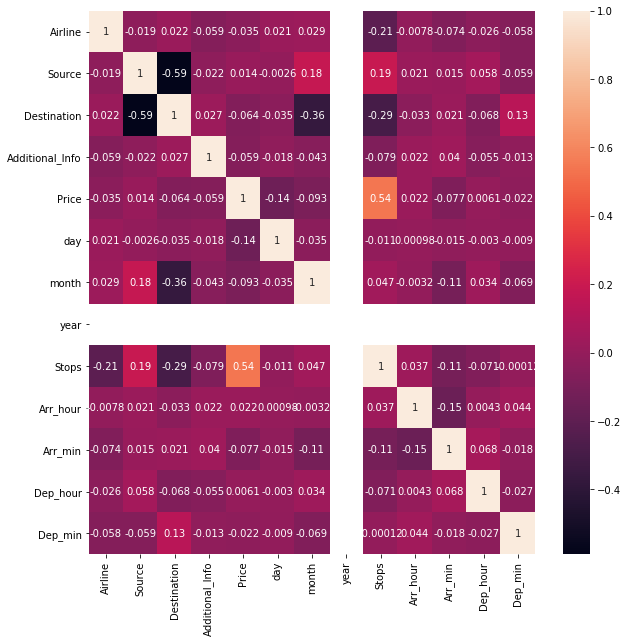

In [42]:
# This heatmap shows the Correlation between the different variables

plt.figure(figsize=(10,10))
sb.heatmap(data.corr(),annot=True)

pairwise plot of relationship with the dataset

Multivariate plotting of dataset

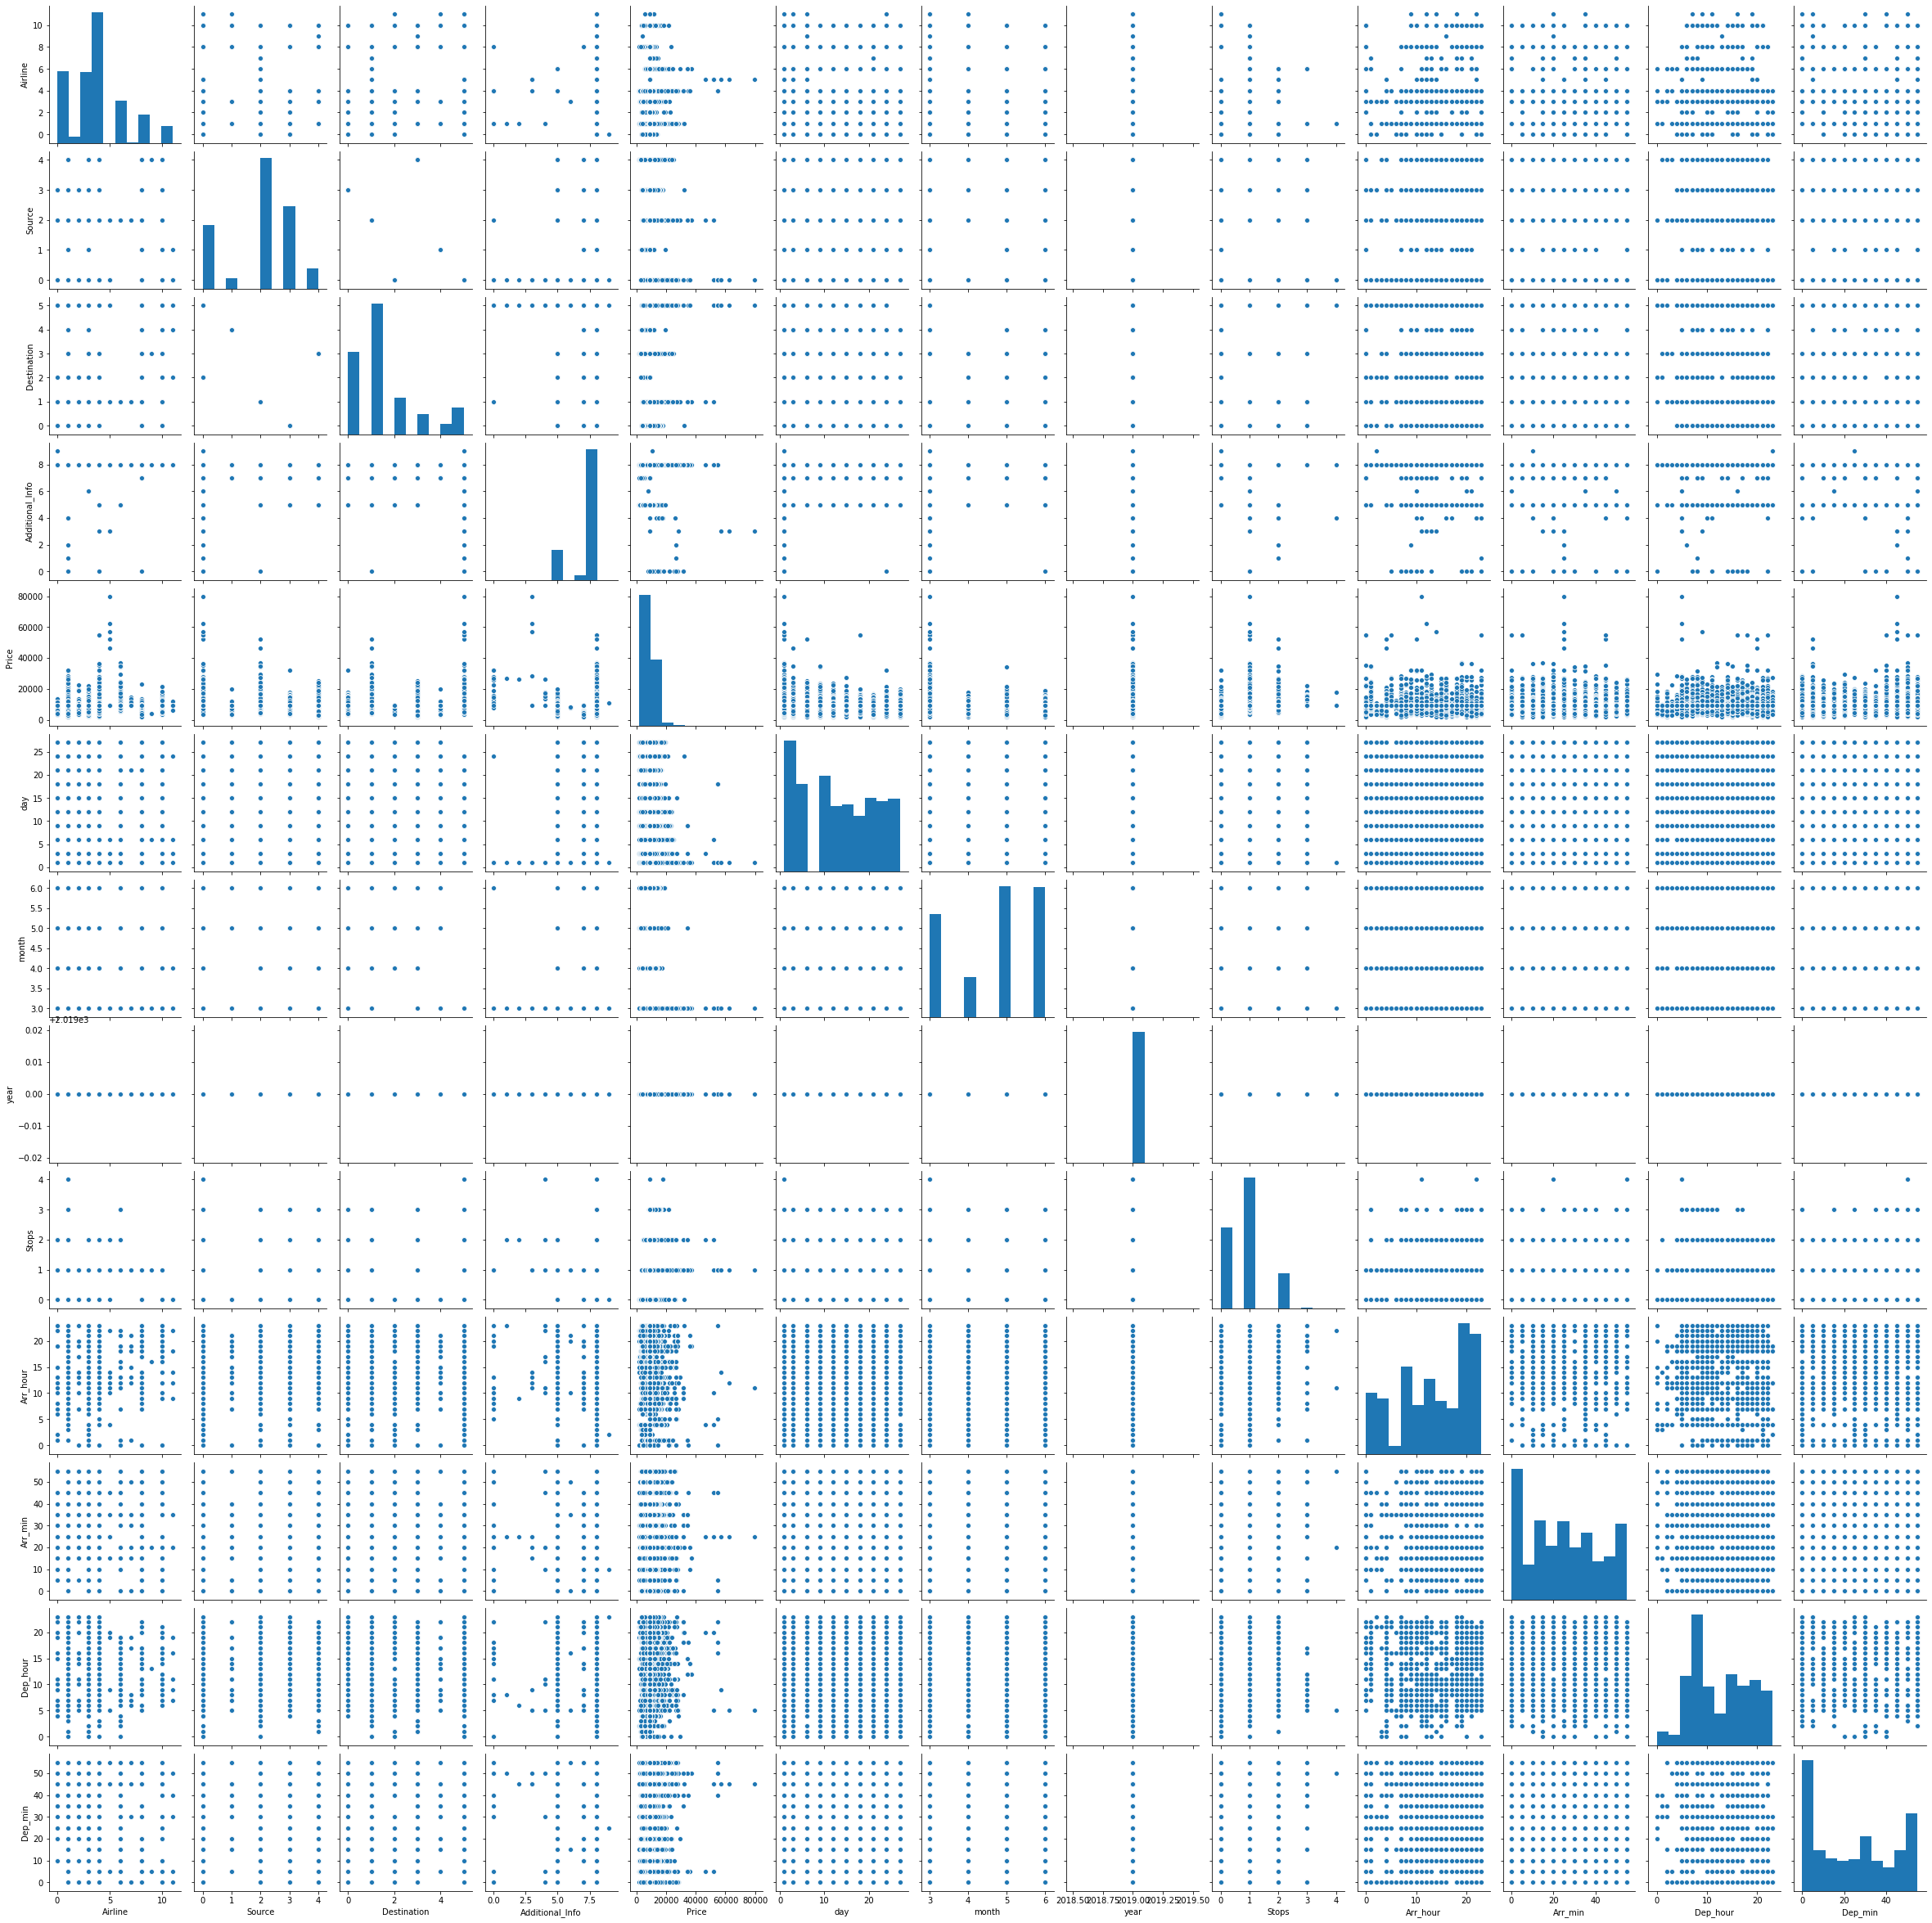

In [43]:
sb.pairplot(data)

# Model Building

Assigning Independent and Dependent Variables

Here x is considered as Independent variable

y is Dependent Variables

In [44]:
x=data.drop(['Price'],axis=1)
y=data['Price']

In [45]:
#preprocessing the data with standard scaler

x=StandardScaler().fit_transform(x)

In [46]:
x

array([[-0.41333477, -1.65803232,  2.41941194, ..., -0.88556402,
         1.65387891, -0.23934476],
       [-1.25939127,  0.88743964, -0.97430112, ..., -0.58361529,
        -1.30982886,  1.35371549],
       [ 0.00969347,  0.03894899, -0.29555851, ...,  0.02028216,
        -0.61248585,  0.02616528],
       ...,
       [ 0.00969347,  0.03894899, -0.29555851, ...,  0.02028216,
         1.47954315,  1.35371549],
       [-1.25939127,  0.03894899, -0.29555851, ..., -0.58361529,
        -1.48416461, -1.30138492],
       [ 0.85574997,  0.03894899, -0.29555851, ..., -0.58361529,
        -1.48416461,  1.61922553]])

We will split the data into a training and a test part. The models will be trained on the training data set and tested on the test data set

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=250)

In [48]:
#working on LinearRegression 
#training and testing data using LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [49]:
#Finding R2 score, mean_absolute_error,mean_squared_error, root_mean_square on linearRegressor

print('R2 score :',metrics.r2_score(y_test,pred))
print('MAE :',metrics.mean_absolute_error(y_test,pred))
print('MSE :',metrics.mean_squared_error(y_test,pred))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 score : 0.3548607870414455
MAE : 2428.155861928278
MSE : 10770959.299093885
RMSE : 3281.9139688745477


cross valiadtion and prediction

In [50]:
#cross valiadtion
score=cross_val_score(lr,x,y,cv=5)
print('mean score :',score.mean())
print('STD score:',score.std())
print()
#cross prediction
predscore=cross_val_predict(lr,x,y,cv=5)
print("cross prediction",predscore)

mean score : -5.4548411190774384e+29
STD score: 1.0909682238154877e+30

cross prediction [ 7127.75350638 12381.79869454 12534.28423121 ... 11509.67511487
 10597.18704861  8753.19229383]


In [51]:
#working on Lasso 
#training and testing data using Lasso

la=Lasso()
la.fit(x_train,y_train)
pred=la.predict(x_test)

In [52]:
#Finding R2 score, mean_absolute_error,mean_squared_error, root_mean_square on lasso

print('R2 score :',metrics.r2_score(y_test,pred))
print('MAE :',metrics.mean_absolute_error(y_test,pred))
print('MSE :',metrics.mean_squared_error(y_test,pred))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 score : 0.35485540164249674
MAE : 2428.039003804408
MSE : 10771049.21133565
RMSE : 3281.9276669871397


cross valiadtion and prediction

In [53]:
#cross valiadtion
score=cross_val_score(la,x,y,cv=5)
print('mean score :',score.mean())
print('STD score:',score.std())
print()
#cross prediction
predscore=cross_val_predict(la,x,y,cv=5)
print("cross prediction",predscore)

mean score : -5.448056925214393e+29
STD score: 1.0896113850428786e+30

cross prediction [ 7125.62291956 12384.01425417 12534.80116649 ... 11505.62850915
 10597.3447273   8757.6896583 ]


In [54]:
#working on Ridge 
#training and testing data using Ridge

rg=Ridge()
rg.fit(x_train,y_train)
pred=rg.predict(x_test)

In [55]:
#Finding R2 score, mean_absolute_error,mean_squared_error, root_mean_square on Ridge

print('R2 score :',metrics.r2_score(y_test,pred))
print('MAE :',metrics.mean_absolute_error(y_test,pred))
print('MSE :',metrics.mean_squared_error(y_test,pred))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 score : 0.354860564951058
MAE : 2428.154106605862
MSE : 10770963.007016884
RMSE : 3281.9145337770274


In [56]:
#cross valiadtion
score=cross_val_score(rg,x,y,cv=5)
print('mean score :',score.mean())
print('STD score:',score.std())
print()
#cross prediction
predscore=cross_val_predict(rg,x,y,cv=5)
print("cross prediction",predscore)

mean score : -5.4536943625738104e+29
STD score: 1.0907388725147621e+30

cross prediction [ 7127.85018716 12381.57312956 12533.87707493 ... 11509.39957556
 10597.21145639  8753.21605457]


In [57]:
#working on RandomForestRegressor 
#training and testing data using RandomForestRegressor

rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)

In [58]:
#Finding R2 score, mean_absolute_error,mean_squared_error, root_mean_square on RandomForestRegressor

print('R2 score :',metrics.r2_score(y_test,pred))
print('MAE :',metrics.mean_absolute_error(y_test,pred))
print('MSE :',metrics.mean_squared_error(y_test,pred))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 score : 0.6796610073350363
MAE : 1518.4724992510219
MSE : 5348238.306712134
RMSE : 2312.6258466756212


In [59]:
#cross valiadtion
score=cross_val_score(rfr,x,y,cv=5)
print('mean score :',score.mean())
print('STD score:',score.std())
print()
#cross prediction
predscore=cross_val_predict(rfr,x,y,cv=5)
print("cross prediction",predscore)

mean score : -1.196409350784697e+30
STD score: 2.392818701569394e+30

cross prediction [ 6747.97179978  8764.19756482 13175.34124154 ... 15634.28
 14721.93        7485.8       ]


In [60]:
#working on DecisionTreeRegressor 
#training and testing data using DecisionTreeRegressor

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)

In [61]:
#Finding R2 score, mean_absolute_error,mean_squared_error, root_mean_square on DecisionTreeRegressor

print('R2 score :',metrics.r2_score(y_test,pred))
print('MAE :',metrics.mean_absolute_error(y_test,pred))
print('MSE :',metrics.mean_squared_error(y_test,pred))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 score : 0.4443547517243779
MAE : 1694.1334750445262
MSE : 9276807.600123549
RMSE : 3045.785218974501


In [62]:
#cross valiadtion
score=cross_val_score(dtr,x,y,cv=5)
print('mean score :',score.mean())
print('STD score:',score.std())
print()
#cross prediction
predscore=cross_val_predict(dtr,x,y,cv=5)
print("cross prediction",predscore)

mean score : -1.2451912207369795e+30
STD score: 2.490382441473959e+30

cross prediction [ 7303.  5562. 13292. ... 15764. 12940.  7155.]


# Grid Search

GridSearchCV for the best model

In [63]:
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }
gridscv = GridSearchCV(estimator=rfr, param_grid=param_grid, n_jobs=-1, cv=5)
gridscv.fit(x_train, y_train)
print(gridscv)
print('best score :',gridscv.best_score_)
print('best params :',gridscv.best_params_)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

# Saving the model with joblib


In [64]:
# Save the best model with the help of joblib and pickle

joblib.dump(rfr,'flight.pkl')

['flight.pkl']

# Conclusion


Importing the required libraries Analysing the dataset by check various aspects..

Data Visualization is done by Univariate bivariate and multivariate to get a better insight of the data..

Exploratory data analysis and Data Preprocessing is used to prepare the data for modeling

data is tarined and tested using different Models ,this includes working with metrics and cross validation,gridsearch rtc

Saving the best model with joblib